# import libraries

In [2]:
# import libraries
import numpy as np
import pandas as pd

# import dataset

In [3]:
# import dataset
insurance_df = pd.read_csv('insurance.csv')

# make a copy of the original dataset
insurance = insurance_df.copy()

In [4]:
# initial look at the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# basic info about the data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# basisc statistical details about the data
insurance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
#  basic statistical details about categorical columns
insurance.describe(include='O').transpose()

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [8]:
# list catagorical unique values
for col in insurance.select_dtypes(include='object'):
    print(f'{col} : {insurance[col].unique()}')

sex : ['female' 'male']
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']


# data cleaning

In [9]:
# check for missing values
insurance.isnull().sum()

# at this point, no furthre cleaning is required as there are no missing values or duplicates

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# data modeling

In [10]:
# categorical feature label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in insurance.select_dtypes(include='object'):
    insurance[col] = le.fit_transform(insurance[col])

    

In [12]:
# # split the data into features and target variable
X = insurance.drop('region', axis=1)
y = insurance['region']

In [13]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
# feature scaling with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# model fitting using Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)


,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


# model prediction

In [16]:
# model prediction
y_pred = gnb.predict(X_test_scaled)
y_prob = gnb.predict_proba(X_test_scaled)

# model evaluation

In [17]:
# model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.37
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.15      0.24        65
           1       0.29      0.57      0.39        65
           2       0.46      0.63      0.53        73
           3       0.23      0.08      0.11        65

    accuracy                           0.37       268
   macro avg       0.37      0.36      0.32       268
weighted avg       0.37      0.37      0.32       268

Confusion Matrix:
[[10 38 13  4]
 [ 5 37 17  6]
 [ 1 19 46  7]
 [ 4 33 23  5]]


# feature importance

Feature: age, Importance: [-0.01205111  0.01680778 -0.17398703 -0.01559712 -0.00071646  0.03391498]
Feature: sex, Importance: [-0.0060123  -0.01036103 -0.25098063  0.02536675 -0.07028594 -0.09461202]
Feature: bmi, Importance: [ 0.01052357  0.03106973  0.41345507 -0.03711303  0.10032413  0.08921238]
Feature: children, Importance: [ 0.00623875 -0.04115631 -0.03845316  0.03170843 -0.04128621 -0.03902176]


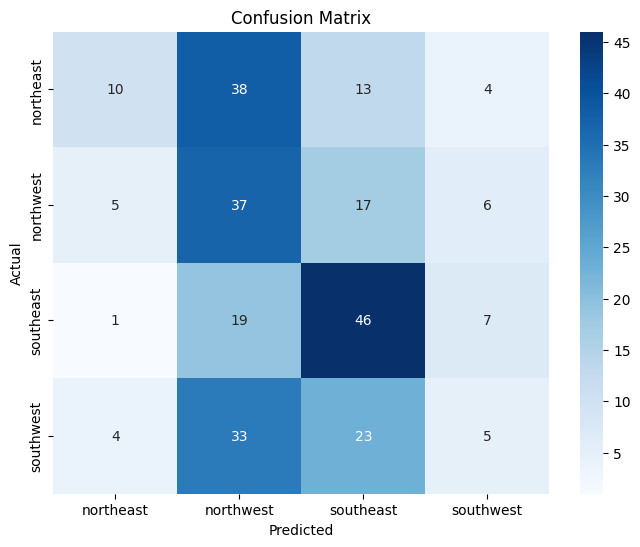

In [18]:
# feature importance
importances = gnb.theta_
feature_names = X.columns
for feature, importance in zip(feature_names, importances):
    print(f'Feature: {feature}, Importance: {importance}')
# visualization of confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Sample 1 - Predicted Region: southeast, Probabilities: [0.1693501  0.07284447 0.58000729 0.17779814]
Sample 2 - Predicted Region: northwest, Probabilities: [0.2502947  0.35006623 0.14092384 0.25871522]
Sample 3 - Predicted Region: southwest, Probabilities: [0.21359536 0.26661164 0.24068329 0.27910971]
Sample 4 - Predicted Region: southwest, Probabilities: [0.2022545  0.17987257 0.30663042 0.31124252]
Sample 5 - Predicted Region: southeast, Probabilities: [0.23350574 0.25356219 0.26091711 0.25201497]


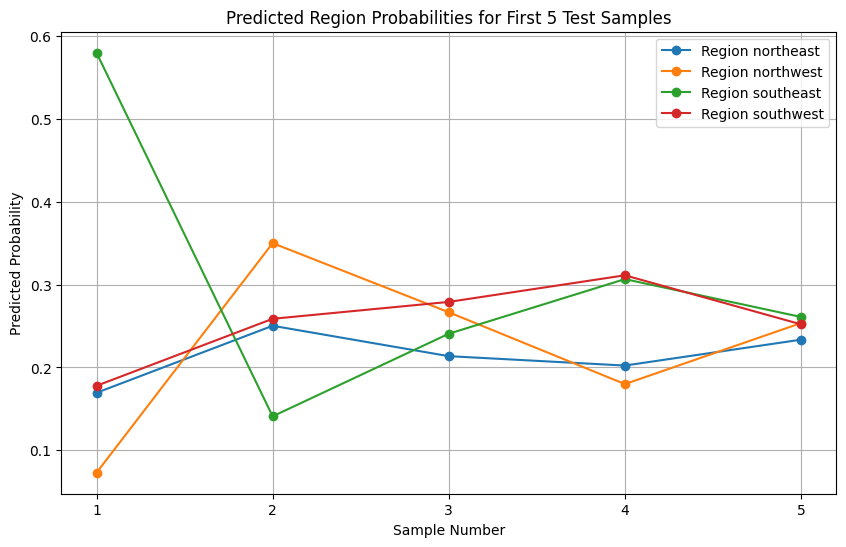

In [19]:
# region probability distribution for first 5 test samples
for i in range(5):
    print(f'Sample {i+1} - Predicted Region: {le.inverse_transform([y_pred[i]])[0]}, Probabilities: {y_prob[i]}')

# region probability distribution visualization 
import matplotlib.pyplot as plt
import numpy as np
samples = np.arange(1, 6)
probabilities = y_prob[:5]
plt.figure(figsize=(10,6))
for i in range(probabilities.shape[1]):
    plt.plot(samples, probabilities[:, i], marker='o', label=f'Region {le.inverse_transform([i])[0]}')
plt.xticks(samples)
plt.xlabel('Sample Number')
plt.ylabel('Predicted Probability')
plt.title('Predicted Region Probabilities for First 5 Test Samples')
plt.legend()
plt.grid()
plt.show()


# save model

In [20]:
# saving the model using joblib
import joblib
joblib.dump(gnb, 'naive_bayes_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
# loading the model
loaded_model = joblib.load('naive_bayes_model.joblib')